In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [3]:
data = pd.read_csv("/content/Turbine_Data.csv")


In [4]:
mean = 0
std = 1
n = len(data)
white_noise = np.random.normal(mean, std, size=n)

data['WhiteNoise'] = white_noise

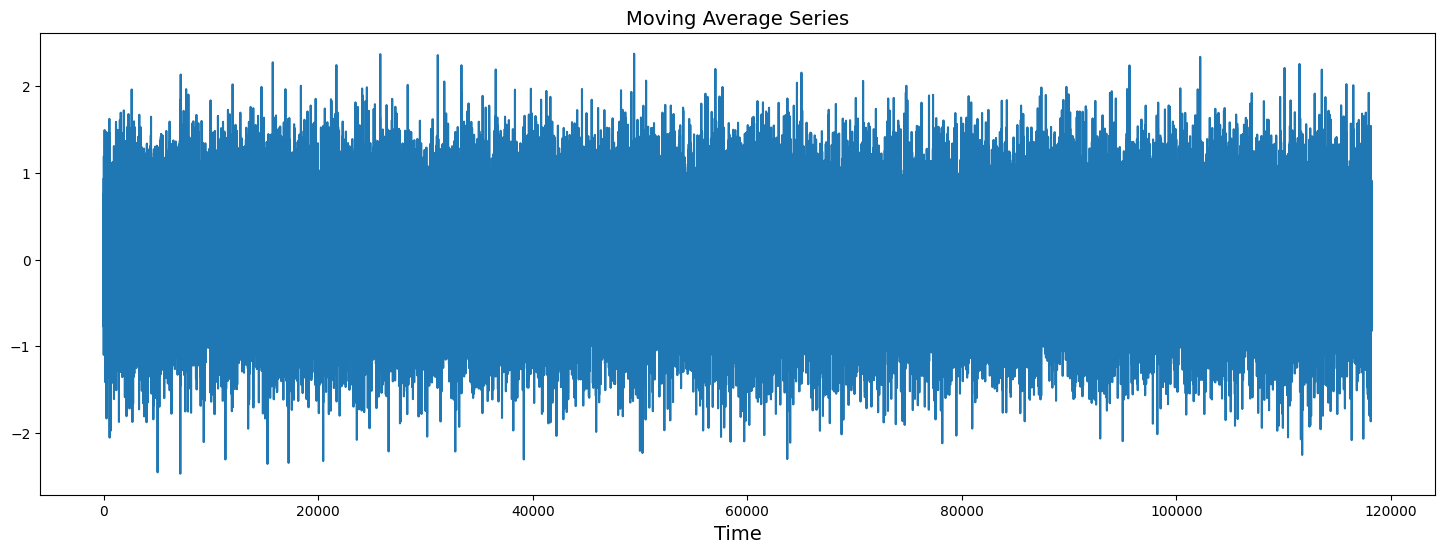

In [5]:
w_series = pd.Series(white_noise)

window_size = 3
windows = w_series.rolling(window_size)

moving_averages = windows.mean()


plt.figure(figsize=(18, 6))
plt.plot(moving_averages)
plt.title("Moving Average Series", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.show()


In [7]:
from statsmodels.tsa.arima_process import ArmaProcess
ar1 = np.array([1])
ma1 = np.array([1, 0.6])
data_subset = data['ActivePower'].iloc[:100]
MA_object = ArmaProcess(ar1, ma1)
simulated_data = MA_object.generate_sample(nsample=100)
simulated_series = pd.Series(simulated_data, index=data_subset.index)

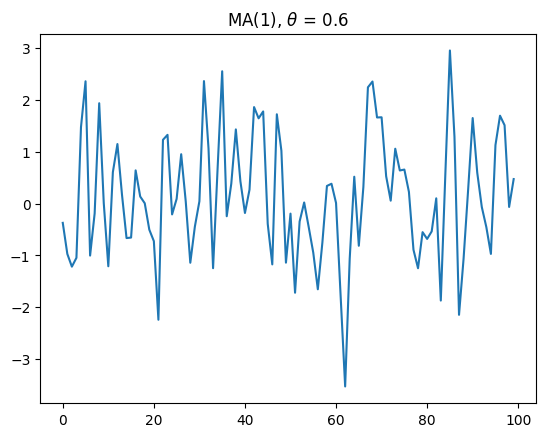

In [8]:
plt.plot(simulated_series)
plt.title("MA(1), $\\theta$ = 0.6")
plt.show()